### 实际案例
    wav文件是一种音频文件的格式,音频文件为二进制文件,wav文件有头部信息和音频采样数据构成,前44个字节为头部信息,包括声道数,采样率,PCM位宽等等,后面是音频采样数据
    使用python，分析一个wav文件的头部信息,处理音频文件数据

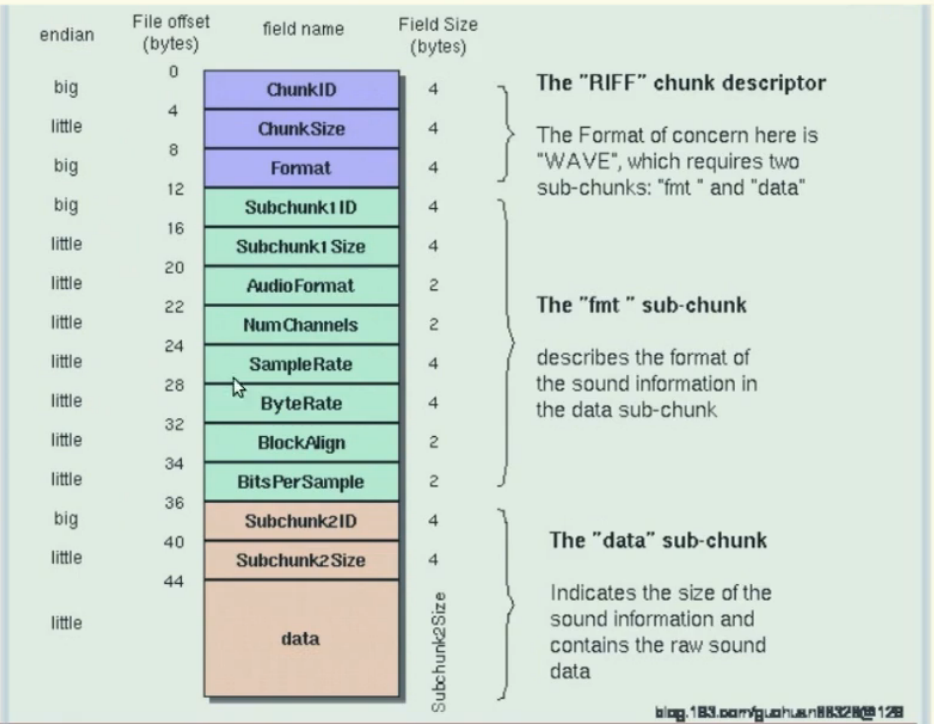

### 解决方案
    1.open函数以二进制模式打开文件,指定mode的参数为‘b’
    2.二进制数据可以用readinto,读入到提前分配好的buffer中,便于数据处理
    3.解析二进制数据可以使用标准库中的struct模块的unpack方法

In [1]:
f = open('demo.wav','rb')

In [2]:
info = f.read(44)

In [3]:
info

'RIFF8>\x06\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00"V\x00\x00\x88X\x01\x00\x04\x00\x10\x00data\xe4<\x06\x00'

In [4]:
#解析二进制数据
import struct

In [5]:
struct.unpack('h','\x01\x02')

(513,)

In [9]:
struct.unpack('h',info[22:24])

(2,)

In [12]:
struct.unpack('h',info[24:26])

(22050,)

In [13]:
struct.unpack('h',info[34:36])

(16,)

In [14]:
struct.unpack('h',info[36:38])

(24932,)

### 读取数据部分

In [15]:
import array

In [17]:
f.seek(0,2)

In [18]:
f.tell()

409152

In [19]:
n = (f.tell() - 44) / 2

In [20]:
buf = array.array('h',(0 for _ in range(n)))

In [22]:
f.seek(44)

In [23]:
f.readinto(buf) #把数据读入到buf中

409108

In [24]:
buf[0]

0

In [28]:
buf[2]

-1

In [29]:
for i in xrange(n):buf[i] /= 8

In [30]:
f2 = open('demo2.wav','wb')

In [31]:
f2.write(info)

In [32]:
buf.tofile(f2) #把buf中的数据写入到文件中去 传入一个文件对象

In [33]:
f2.close()